In [10]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib
!pip install --upgrade tensorflow
!pip install --upgrade keras



  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [44 lines of output]
  Traceback (most recent call last):
    File "C:\Users\gabri\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
      parsed = _parse_requirement(requirement_string)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\gabri\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\gabri\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\gabri\anaconda3\Lib\site-packages\setuptools\_v

In [2]:
import tensorflow as tf
import os

In [5]:
# Set GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
tf.config.list_physical_devices('GPU')

[]

# Remove bad images

In [149]:
import os
import cv2
import imghdr

data_dir = r'C:\Users\gabri\OneDrive\Bureau\Google handstand iimages' 
image_exts = ['jpeg', 'jpg', 'bmp', 'png', 'PNG']

for image_file in os.listdir(data_dir):
    image_path = os.path.join(data_dir, image_file)

    try:
        img = cv2.imread(image_path)

        if img is None:
            print('Unable to read image: {}'.format(image_path))
            os.remove(image_path)
            continue  # Skip to the next iteration

        tip = imghdr.what(image_path)

        if tip not in image_exts:
            print('Image not in ext list {}'.format(image_path))
            os.remove(image_path)

    except Exception as e:
        print('Issue with image {}: {}'.format(image_path, str(e)))
        # os.remove(image_path)

Image not in ext list C:\Users\gabri\OneDrive\Bureau\Google handstand iimages\640a0a32afacbf1815883776_Justin20Garcia20.webp
Image not in ext list C:\Users\gabri\OneDrive\Bureau\Google handstand iimages\71923080.jpg
Image not in ext list C:\Users\gabri\OneDrive\Bureau\Google handstand iimages\amanda-handstand-lotus.jpg
Image not in ext list C:\Users\gabri\OneDrive\Bureau\Google handstand iimages\grg6331269-girl-rainbow-gymnastics-female-gymnast-silhouette-handstand--charcoal-ztb-garment.webp
Image not in ext list C:\Users\gabri\OneDrive\Bureau\Google handstand iimages\handstand-ashtanga-yoga-class-benefits-canggu-ubuntu-bali.jpg
Image not in ext list C:\Users\gabri\OneDrive\Bureau\Google handstand iimages\Handstand-Bar-Lifestyle01.jpg
Image not in ext list C:\Users\gabri\OneDrive\Bureau\Google handstand iimages\handstand-vid.webp
Image not in ext list C:\Users\gabri\OneDrive\Bureau\Google handstand iimages\Nathan-Leith-Handstand.jpg
Image not in ext list C:\Users\gabri\OneDrive\Bureau\

# Load data

In [169]:
import os
import cv2
import mediapipe as mp
import numpy as np

input_folder = r'C:\Users\gabri\OneDrive\Bureau\Test'
output_folder_good = r'C:\Users\gabri\OneDrive\Bureau\test res'
output_folder_bad = r'C:\Users\gabri\OneDrive\Bureau\test res'

mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

def calculate_angle(a, b, c):
    a = np.array(a)  # First
    b = np.array(b)  # Mid
    c = np.array(c)  # End

    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians * 180.0 / np.pi)

    if angle > 180.0:
        angle = 360 - angle

    return angle


with mp_pose.Pose(static_image_mode=True, model_complexity=2, min_detection_confidence=0.5) as pose:

    def process_image(image_path):
        try:
            image = cv2.imread(image_path)
            if image is None:
                print(f"Error: Unable to read image {image_path}")
                return

            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            result = pose.process(image_rgb)

            if result.pose_landmarks:
                mp_drawing.draw_landmarks(image, result.pose_landmarks, mp_pose.POSE_CONNECTIONS)

                
                landmarks = result.pose_landmarks.landmark

                # Get coordinates for angles
                left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,
                                 landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
                left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,
                              landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
                left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,
                               landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

                right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,
                                  landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
                right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,
                               landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
                right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,
                                landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]

                right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,
                             landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
                right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,
                               landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
                right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,
                                landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]

                left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,
                            landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
                left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,
                              landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
                left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,
                               landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

                left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,
                              landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
                right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,
                               landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]

                left_shoulder_angle = calculate_angle(left_elbow, left_shoulder, left_hip)
                right_shoulder_angle = calculate_angle(right_elbow, right_shoulder, right_hip)

                left_hip_angle = calculate_angle(left_shoulder, left_hip, left_knee)
                right_hip_angle = calculate_angle(right_shoulder, right_hip, right_knee)

                left_knee_angle = calculate_angle(left_hip, left_knee, left_ankle)
                right_knee_angle = calculate_angle(right_hip, right_knee, right_ankle)

                left_elbow_angle = calculate_angle(left_wrist, left_elbow, left_shoulder)
                right_elbow_angle = calculate_angle(right_wrist, right_elbow, right_shoulder)

                hand_elbow_hip_right_angle = calculate_angle(right_wrist, right_elbow, right_hip)
                hand_elbow_hip_left_angle = calculate_angle(left_wrist, left_elbow, left_hip)

                hand_hip_ankle_right_angle = calculate_angle(right_wrist, right_hip, right_ankle)
                hand_hip_ankle_left_angle = calculate_angle(left_wrist, left_hip, left_ankle)
                
                hand_shoulder_ankle_right_angle = calculate_angle(right_wrist, right_shoulder, right_ankle)
                hand_shoulder_ankle_left_angle = calculate_angle(left_wrist, left_shoulder, left_ankle)

                shoulder_hip_ankle_right_angle = calculate_angle(right_shoulder, right_hip, right_ankle)
                shoulder_hip_ankle_left_angle = calculate_angle(left_shoulder, left_hip, left_ankle)
                
                
                shoulder_hip_ankle_right_angle = calculate_angle(right_shoulder, right_hip, right_ankle)
                shoulder_hip_ankle_left_angle = calculate_angle(left_shoulder, left_hip, left_ankle)

                # Conditions for a "Good" handstand
                if (left_shoulder_angle > 165 and right_shoulder_angle > 165) and \
                        (right_knee_angle > 175 and left_knee_angle > 175) or \
                        (left_shoulder_angle > 130 or right_shoulder_angle > 130) and \
                        (shoulder_hip_ankle_right_angle > 175 or shoulder_hip_ankle_left_angle > 175) or \
                        (left_elbow_angle > 170 and right_elbow_angle > 170) and \
                        (right_knee_angle > 170 and left_knee_angle > 170) and \
                        (left_hip_angle > 170 and right_hip_angle > 170) or \
                        (hand_elbow_hip_right_angle > 175 and hand_elbow_hip_left_angle > 175) and \
                        (shoulder_hip_ankle_right_angle > 165 or shoulder_hip_ankle_left_angle > 165) or \
                        (hand_shoulder_ankle_right_angle > 175 and hand_shoulder_ankle_left_angle > 175) and (shoulder_hip_ankle_right_angle > 165 or shoulder_hip_ankle_left_angle > 165):
                    
                    output_path = os.path.join(output_folder_good, f"1_{os.path.basename(image_path)}")
                    cv2.imwrite(output_path, image)
                    print(f"Processed image saved to {output_path}")
                else:
                    
                    output_path = os.path.join(output_folder_bad, f"0_{os.path.basename(image_path)}")
                    cv2.imwrite(output_path, image)
                    print(f"Processed image saved to {output_path}")

        except Exception as e:
            print(f"Error processing image {image_path}: {e}")


    for file in os.listdir(input_folder):
        if file.endswith('.jpg') or file.endswith('.png') or file.endswith('.jpeg') or file.endswith('.PNG'):
            image_path = os.path.join(input_folder, file)
            process_image(image_path)

Processed image saved to C:\Users\gabri\OneDrive\Bureau\test res\0_0_contrast_1.jpg
Processed image saved to C:\Users\gabri\OneDrive\Bureau\test res\0_0_contrast_1_1_2_3_4.jpg
Processed image saved to C:\Users\gabri\OneDrive\Bureau\test res\0_1_contrast_250_1_2_3_4_5_6_7_8_9_10.jpg
Processed image saved to C:\Users\gabri\OneDrive\Bureau\test res\0_1_contrast_51_1_2_3_4_5_6_7_8_9_10_11_12_13_14.jpg
Processed image saved to C:\Users\gabri\OneDrive\Bureau\test res\0_1_contrast_5_1_2_3_4_5_6_7_8_9_10_11.jpg
Processed image saved to C:\Users\gabri\OneDrive\Bureau\test res\0_1_contrast_67_1_2_3_4.jpg
Processed image saved to C:\Users\gabri\OneDrive\Bureau\test res\1_1_contrast_9_1_2_3_4_5_6_7_8_9_10_11_12.jpg
Processed image saved to C:\Users\gabri\OneDrive\Bureau\test res\1_1_OIP.jpg
Processed image saved to C:\Users\gabri\OneDrive\Bureau\test res\1_1_th.jpg
Processed image saved to C:\Users\gabri\OneDrive\Bureau\test res\0_IMG_1006.PNG


# normalize data

Dataset (Standardized) - Mean: 9.727668406239467e-17   Standard Deviation: 1.0


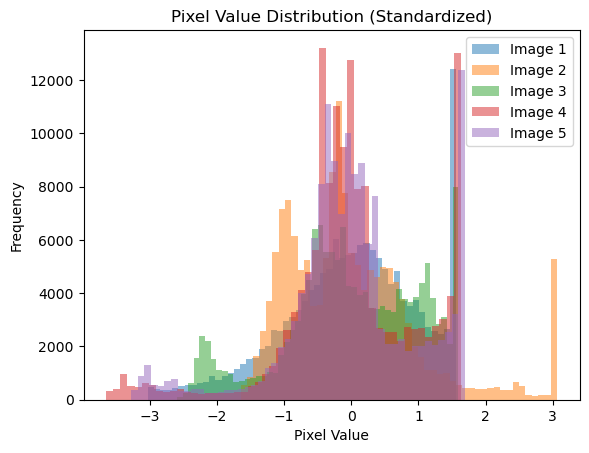

In [171]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def normalize_images_standardized(folder_path, label_mapping, target_size=(224, 224)):
    images = []
    labels = []

    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".PNG"):
            file_path = os.path.join(folder_path, filename)

            img = cv2.imread(file_path)
            img = cv2.resize(img, target_size)

            # Standardize pixel values
            img = (img - np.mean(img)) / np.std(img)

            images.append(img)

            label = label_mapping[os.path.basename(folder_path)]
            labels.append(label)

    return np.array(images), np.array(labels)

def check_normalization(images):
    mean_value = np.mean(images)
    std_dev = np.std(images)
    return mean_value, std_dev


good_handstand_folder = r"C:\Users\gabri\OneDrive\Bureau\test res"
bad_handstand_folder = r"C:\Users\gabri\OneDrive\Bureau\test res"

# Define label mapping
label_mapping = {"test res": 1, "test res": 0}

# Use the standardized normalization function
good_handstand_images, _ = normalize_images_standardized(good_handstand_folder, label_mapping)
bad_handstand_images, _ = normalize_images_standardized(bad_handstand_folder, label_mapping)

all_images_standardized = np.concatenate([good_handstand_images, bad_handstand_images], axis=0)

# Check normalization for the entire dataset
mean_value_standardized, std_dev_standardized = check_normalization(all_images_standardized)
print("Dataset (Standardized) - Mean:", mean_value_standardized, "  Standard Deviation:", std_dev_standardized)

# Plot histograms of pixel values for the first few images
for i in range(5):
    plt.hist(all_images_standardized[i].flatten(), bins=50, alpha=0.5, label=f'Image {i + 1}')

plt.title('Pixel Value Distribution (Standardized)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Split

In [152]:
import os
from sklearn.model_selection import train_test_split
import shutil


source_directory = r'C:\Users\gabri\OneDrive\Bureau\test res'


destination_directory = r'C:\Users\gabri\OneDrive\Bureau\test split'

# Create directories for training, validation, and test sets
train_dir = os.path.join(destination_directory, 'train')
validation_dir = os.path.join(destination_directory, 'validation')
test_dir = os.path.join(destination_directory, 'test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# List of class folders
class_folders = ['good', 'bad']


train_ratio = 0.7
validation_ratio = 0.2
test_ratio = 0.1

for class_folder in class_folders:
    class_path = os.path.join(source_directory, class_folder)

    # List all files in the class folder
    files = os.listdir(class_path)

    # Print the number of files in each class folder
    print(f"Class: {class_folder}, Total files: {len(files)}")

    # Use train_test_split to split the files into training, validation, and test sets
    train_files, test_files = train_test_split(files, test_size=test_ratio, random_state=42)
    train_files, validation_files = train_test_split(train_files, test_size=validation_ratio/(1-test_ratio), random_state=42)

    
    train_destination = os.path.join(train_dir, class_folder)
    validation_destination = os.path.join(validation_dir, class_folder)
    test_destination = os.path.join(test_dir, class_folder)

    os.makedirs(train_destination, exist_ok=True)
    os.makedirs(validation_destination, exist_ok=True)
    os.makedirs(test_destination, exist_ok=True)

    # Move files to their respective sets
    for file in train_files:
        shutil.copy(os.path.join(class_path, file), os.path.join(train_destination, file))

    for file in validation_files:
        shutil.copy(os.path.join(class_path, file), os.path.join(validation_destination, file))

    for file in test_files:
        shutil.copy(os.path.join(class_path, file), os.path.join(test_destination, file))

print("Script execution completed.")

Class: good, Total files: 929
Class: bad, Total files: 1257
Script execution completed.


# CNN Model

# number 1

In [153]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define and compile the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(244, 244, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss=BinaryCrossentropy(), metrics=['accuracy'])

model.summary()

train_dir = r"C:\Users\gabri\OneDrive\Bureau\test split\train"
val_dir = r"C:\Users\gabri\OneDrive\Bureau\test split\validation"

# Define data generators with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(244, 244),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(244, 244),
    batch_size=32,
    class_mode='binary'
)


logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# Fit the model with data augmentation
hist = model.fit(
    train_generator,
    epochs=100,
    validation_data=val_generator,
    callbacks=[tensorboard_callback]
)

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_81 (Conv2D)          (None, 242, 242, 32)      896       
                                                                 
 max_pooling2d_81 (MaxPooli  (None, 121, 121, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_82 (Conv2D)          (None, 119, 119, 64)      18496     
                                                                 
 max_pooling2d_82 (MaxPooli  (None, 59, 59, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_83 (Conv2D)          (None, 57, 57, 128)       73856     
                                                                 
 max_pooling2d_83 (MaxPooli  (None, 28, 28, 128)     

# good_image_classifier_hs.h5

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, LearningRateScheduler


def lr_schedule(epoch):
    return 0.0001 * 0.2 ** epoch


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(244, 244, 3))

# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer=Adam(learning_rate=0.0001), loss=BinaryCrossentropy(), metrics=['accuracy'])

model.summary()

train_dir = r"C:\Users\gabri\OneDrive\Bureau\test split\train"
val_dir = r"C:\Users\gabri\OneDrive\Bureau\test split\validation"
test_dir = r"C:\Users\gabri\OneDrive\Bureau\test split\test"


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(244, 244),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(244, 244),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(244, 244),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Do not shuffle test data
)

# callback
logdir = 'logs'
tensorboard_callback = TensorBoard(log_dir=logdir)


early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=50,
    restore_best_weights=True
)


lr_scheduler = LearningRateScheduler(lr_schedule)

# Class weights
class_weights = {0: 1.0, 1: 2.0}

# Fit the model
hist = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    class_weight=class_weights
)

# Evaluate on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                        

In [ ]:
import tensorflow as tf


tf.compat.v1.disable_eager_execution()

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping




base_model = VGG16(weights='imagenet', include_top=False, input_shape=(244, 244, 3))

# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss=BinaryCrossentropy(), metrics=['accuracy'])

model.summary()

# Directories
train_dir = r"C:\Users\gabri\OneDrive\Bureau\test split\train"
val_dir = r"C:\Users\gabri\OneDrive\Bureau\test split\validation"
test_dir = r"C:\Users\gabri\OneDrive\Bureau\test split\test"

# Data generators with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(244, 244),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(244, 244),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(244, 244),
    batch_size=32,
    class_mode='binary',
    shuffle=False 
)


logdir = 'logs'
tensorboard_callback = TensorBoard(log_dir=logdir)


early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=50,
    restore_best_weights=True
)

# Class weights
class_weights = {0: 1.0, 1: 2.0}  


tensorboard_callback = TensorBoard(log_dir="./logs", histogram_freq=1)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)


for epoch in range(50):
    print(f"Epoch {epoch + 1}/50")
    for step in range(steps_per_epoch):
        x_batch, y_batch = next(train_generator)
        loss = model.train_on_batch(x_batch, y_batch, class_weight=class_weights)


    val_loss, val_acc = model.evaluate(val_generator)
    print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_acc}")


    tensorboard_callback.on_epoch_end(epoch, {'loss': loss, 'val_loss': val_loss, 'accuracy': val_acc})


    if early_stopping_callback.on_epoch_end(epoch, {'val_loss': val_loss}):
        print("Early stopping.")
        break


test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

# results

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

NameError: name 'hist' is not defined

<Figure size 640x480 with 0 Axes>

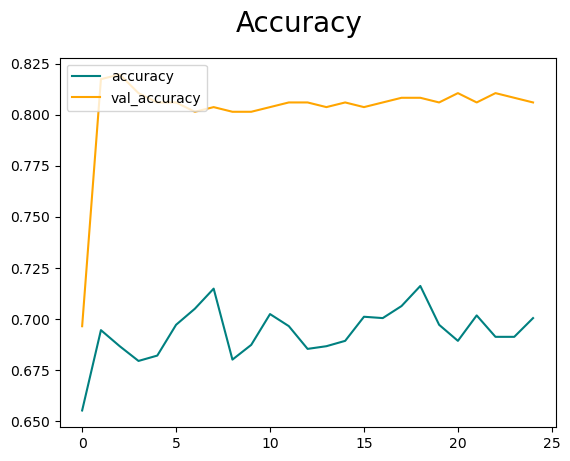

In [199]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# testing accuracy

In [58]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

test_dir = r"C:\Users\gabri\OneDrive\Bureau\test split\test"

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(244, 244),
    batch_size=32,
    class_mode='binary'
)

# Evaluate the model on the test set
results = model.evaluate(test_generator)

# Display the results
print("Test Precision:", results[1])
# Recall and Binary Accuracy might not be present in all cases
if len(results) > 2:
    print("Test Recall:", results[2])
if len(results) > 3:
    print("Test Binary Accuracy:", results[3])

Found 219 images belonging to 2 classes.


C:\Users\gabri\anaconda3\Lib\site-packages\keras\src\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Test Precision: 0.79908675


# test

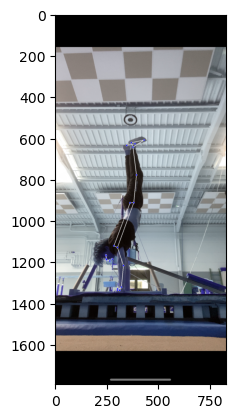

In [12]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf



img = cv2.imread(r'C:\Users\tazpitarte\Desktop\test res\0_IMG_1006.PNG')
plt.imshow(img)
plt.show()

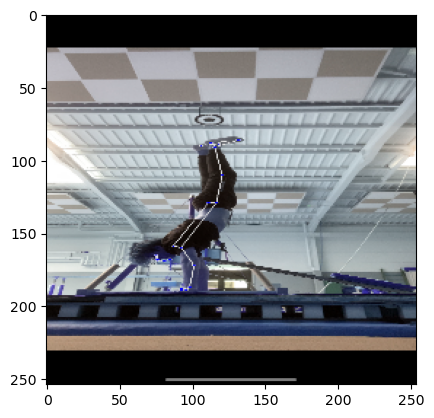

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.compat.v1.disable_eager_execution()
resize = tf.image.resize(img, (254, 254))


with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())

    resized_image = sess.run(resize)


plt.imshow(resized_image.astype(int))
plt.show()

In [32]:
import cv2
import numpy as np
from keras.models import load_model


model_path = r"C:\Users\tazpitarte\Desktop\models\imageclassifier_hs.h5"
model = load_model(model_path)

image_path = r":\Users\tazpitarte\Desktop\test res\0_IMG_1006.PNG"
resize = cv2.imread(image_path)

# Check if the image is loaded successfully
if resize is not None:
    # Resize the image
    resized_image = cv2.resize(resize, (244, 244))

    # Reshape and normalize the image for prediction
    input_data = np.expand_dims(resized_image / 255, 0)

    # Make predictions
    yhat = model.predict(input_data)
else:
    print("Failed to load the image.")
    
print(yhat)

Failed to load the image.
[[0.86170113]]


In [31]:
if yhat > 0.5:
    print(f'Prediction: Good HS, Confidence: {yhat[0][0]}')
else:
    print(f'Prediction: Bad HS, Confidence: {yhat[0][0]}')

Prediction: Good HS, Confidence: 0.8617011308670044


# Save the model

In [13]:
import os
model.save(os.path.join('models', '80_good_image_classifier_hs.h5'))

C:\Users\gabri\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Evaluate handstand and recommend

In [23]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

model_path = r'C:\Users\tazpitarte\Desktop\models\80_good_image_classifier_hs.h5'
model = load_model(model_path)

try:
    model = load_model(model_path)
    print("Model loaded successfully.")
except Exception as e:
    print("Error loading the model:", e)

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (244, 244))
    img = np.expand_dims(img, axis=0) / 255.0
    return img

def evaluate_handstand(image_path, threshold=0.5):
    img = preprocess_image(image_path)
    prediction = model.predict(img)

    # Assuming the model predicts probabilities for binary classification
    predicted_class = 1 if prediction > threshold else 0

    if predicted_class == 1:
        print("Good handstand! Work on other skills now.")
    else:
        print("Bad handstand! Here are some exercises to improve your form:")
        print("1. Improve core strength: Planks, leg raises, and crunches.")
        print("2. Enhance shoulder stability: Shoulder presses, lateral raises, and push-ups.")
        print("3. Practice against a wall: Use a wall for support and focus on form.")

# Example usage with a custom threshold
image_path = r'C:\Users\tazpitarte\Desktop\test res\0_1_contrast_250_1_2_3_4_5_6_7_8_9_10.jpg' 
evaluate_handstand(image_path, threshold=0.5)

Model loaded successfully.
Good handstand! Work on other skills now.


# What is wrong

C:\Users\tazpitarte\AppData\Local\Temp\ipykernel_10108\2299068725.py:57: RuntimeWarning: invalid value encountered in divide
  heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap))
C:\Users\tazpitarte\AppData\Local\Temp\ipykernel_10108\2299068725.py:63: RuntimeWarning: invalid value encountered in cast
  heatmap_colormap = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)


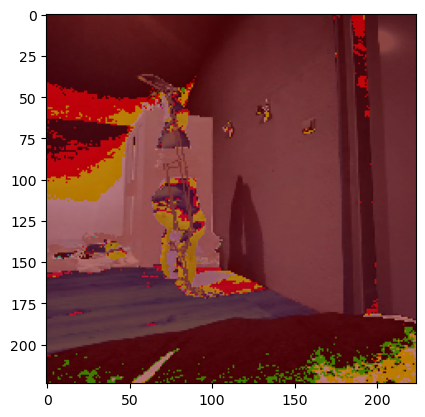

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras import backend as K
import cv2
import tensorflow as tf

# Disable eager execution
tf.config.run_functions_eagerly(False)

# Load your handstand image
img_path = r'C:\Users\tazpitarte\Desktop\test res\0_1_contrast_250_1_2_3_4_5_6_7_8_9_10.jpg'  # Replace with the path to your image
img = image.load_img(img_path, target_size=(224, 224))  # Update target_size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)


model = tf.keras.models.load_model(r"C:\Users\tazpitarte\Desktop\models\imageclassifier_hs.h5")


last_conv_layer_name = 'conv2d_78'

last_conv_layer = model.get_layer(last_conv_layer_name)


with tf.GradientTape() as tape:
    conv_layer_output_value = model.layers[0](img_array) 


grads = tape.gradient(conv_layer_output_value, last_conv_layer.output)
if grads is not None:
    grads = grads[0]
else:
    grads = tf.zeros_like(last_conv_layer.output)


pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))


iterate = K.function([model.layers[0].input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([img_array])


for i in range(conv_layer_output_value.shape[-1]):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]


heatmap = np.mean(conv_layer_output_value, axis=-1)


heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap))


heatmap_resized = cv2.resize(heatmap, (img_array.shape[2], img_array.shape[1]))


heatmap_colormap = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)


img_rgb = img_array[0].astype(heatmap_colormap.dtype)


superimposed_img = cv2.addWeighted(img_rgb, 0.5, heatmap_colormap, 0.5, 0)

# Display the result
plt.imshow(superimposed_img)
plt.show()

In [10]:
import tensorflow as tf
from tensorflow.keras.models import load_model

model = load_model(r'C:\Users\gabri\models\good_image_classifier_hs.h5')
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_78 (Conv2D)          (None, 242, 242, 32)      896       
                                                                 
 max_pooling2d_78 (MaxPooli  (None, 121, 121, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_79 (Conv2D)          (None, 119, 119, 64)      18496     
                                                                 
 max_pooling2d_79 (MaxPooli  (None, 59, 59, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_80 (Conv2D)          (None, 57, 57, 128)       73856     
                                                                 
 max_pooling2d_80 (MaxPooli  (None, 28, 28, 128)     